# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Aluno: Sérgio Strack Junior
       Sabrina de Melo


Para o seguinte estudo, Utilizamos o capítulo 2.1 da AP42, pois meu empreendimento emite poluentes a partir do processo de gaseificador. 
Empreendimento: Serrana Engenharia LTDA.

Resumo do processo: A gaseificação é definida como conversão de biomassa, ou qualquer combustível sólido (material carbonáceo sólido ou líquido), em um gás energético, através da oxidação parcial à elevada temperatura 500°C – 1400°C e pressão variável (atmosférica à 33 bar) (Morrin, Lettieri et al., 2011). Durante a gaseificação, a maior parte do material de alimentação é termicamente decomposto na forma de gás, porém pequenas quantidades de subprodutos são também formadas, incluindo alcatrão, carvão e cinzas.

- Gaseificadores com capacidade de 3 mil toneladas de RSU por mês
- Cada gaseificador trata, por dia, 45,3t de RSU e 2,5t de água contaminada e chorume. 
- Para isso utiliza 27,8t de ar atmosférico produzindo 6,3t de cinzas e 64,3t de GCDR

Utiliamos códigos para encontrar nossa tabela de dados em nosso computador.

In [3]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 2
subChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)

i:\airpolution\tabelas\FE
chp_2_2.csv
  Poluente  Nao controlado       ESP   DSI/ESP    SD/ESP    DSI/FF  SD/FF SD 
0       PM        12.60000  0.105000  0.029500  0.035200  0.089500   0.031100
1       As         0.00214  0.000011       NaN  0.000007  0.000005   0.000021
2       Cd         0.00545  0.000323  0.000044  0.000004  0.000012   0.000014
3       Cr         0.00449  0.000056  0.000016  0.000013  0.000010   0.000015
4       Hg         0.00280  0.002800  0.001980  0.001630  0.001100   0.001100
5       Ni         0.00393  0.000056  0.001610  0.000135  0.000072   0.000026
6       Pb         0.10700  0.001500  0.001450  0.000458  0.000149   0.000131
7      SO2         1.73000       NaN       NaN       NaN  0.327000   0.715000
8      HCl         3.20000       NaN       NaN       NaN  0.079000   0.319000


Gráficos referentes ao processos de emissão do empreendimento de estudo:

#TESTE1

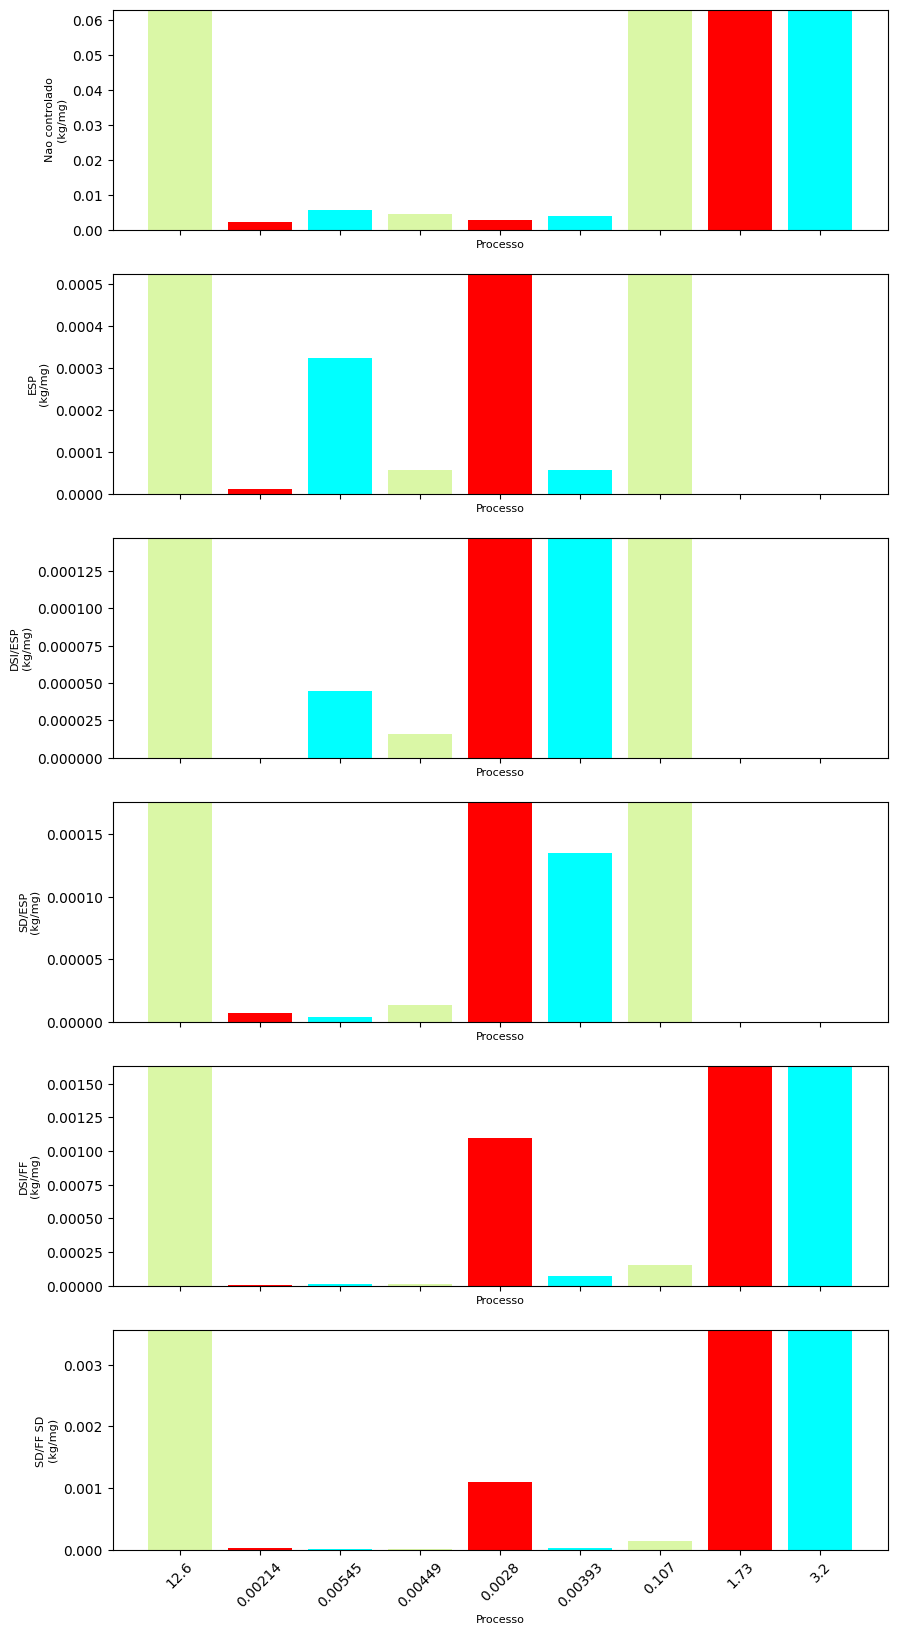

In [4]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 45300 # Considerando uma taxa de atividade

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig, ax = plt.subplots(len(fe.columns)-1, 1, sharex=True, figsize=(10, 20))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)):
    ax[ii-1].bar(fe.index, fe.iloc[:, ii], color=['#DAF7A6', 'red', 'cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii] + '\n(kg/mg)', fontsize=8)

    # Ajustando os rótulos do eixo x para melhorar a legibilidade
    plt.xticks(fe.index, fe['Nao controlado'], rotation=45)
    
    # Ajustando a faixa de escala no eixo y para incluir os valores corretos
    ax[ii-1].set_ylim(0,  fe.iloc[:, ii].max() * 0.005)  # Ajusta a faixa de escala % acima do valor máximo de emissão

# Salva a figura na pasta figures - criar a pasta antes!!
fig.savefig(cwd + '\\imagens\\barplot_fatorEmiss.png')

Gráficos referentes ao processos de emissão do empreendimento de estudo:

#TESTE2

799808.1930000001
1
2
3
4
5
6


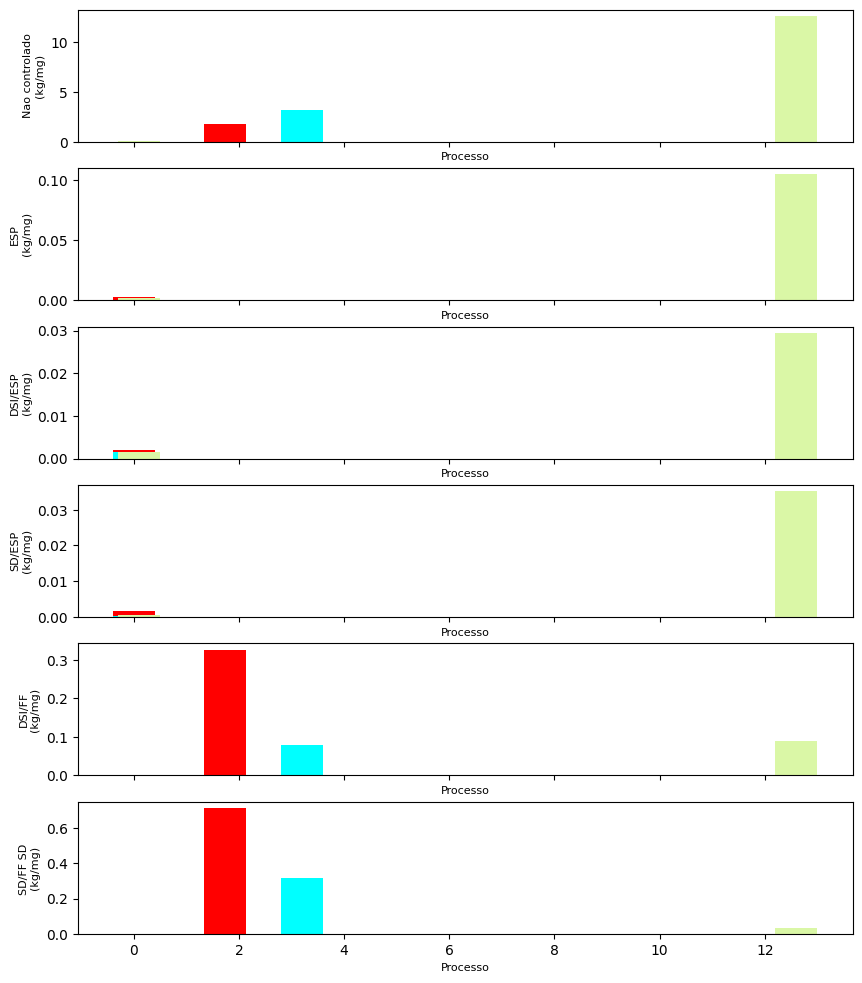

In [5]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 45300 # taxa de atividade em kg
emis = fe['Nao controlado']*atv

#Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(10, 12))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Nao controlado'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/mg)', fontsize=8) 

# Salva a figura na pasta figures - criar a pasta antes!!
fig.savefig(cwd+'\\imagens\\barplot_fatorEmiss.png')

A partir da geração dos gráfico, conseguimos ver 

Criando taxa de atividade aleatória com sazonalidade
Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

Pergunta n° 2 - Elaborar uma função para ler a planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento

In [14]:
import pandas as pd

def estimar_emissao(taxa_atividade, arquivo_planilha):
    # Ler a planilha de fatores de emissão
    df = pd.read_csv(arquivo_planilha)
    
   # Calcular as emissões
    emissao0 = taxa_atividade * df['Nao controlado'].sum()
    emissao1 = taxa_atividade * df['ESP'].sum()
    emissao2 = taxa_atividade * df['DSI/ESP'].sum()
    
    # Retornar uma lista de emissões
    return [emissao0, emissao1, emissao2]

# Exemplo de uso da função
taxa_atividade = 45300  # kg taxa de atividade
arquivo_planilha = r'I:\airpolution\tabelas\FE\chp_2_2.csv'  # caminho completo do arquivo CSV
emissoes_estimadas = estimar_emissao(taxa_atividade, arquivo_planilha)
print("Emissões estimadas:", emissoes_estimadas)


Emissões estimadas: [799808.193, 4971.51192, 1567.3754700000002]


[21.59459653 30.81886633 38.92225609 28.97738914 26.96855354 24.2430797
 37.61552427 41.03892477 40.36331793 48.38799238 20.96833914 39.64575903
 38.28936703 37.9516739  48.79108387 21.37894109 41.07406084 44.47040727
 35.66421256 30.56830192 43.80854793 23.70809998 33.70019278 35.95821982
 41.00085679 23.52386851 27.49047035 32.78053929 38.95307962 46.59412344
 38.82358236 24.75771343 49.30721225 46.15435059 35.45884766 47.61964451
 36.5792154  47.64740985 44.94042574 48.95094017 47.54530586 21.93426003
 25.95489268 32.16712294 48.48309537 29.58483809 25.54035232 46.57510922
 33.82651016 47.20023472]


Text(0, 0.5, 'Valores das concentrações')

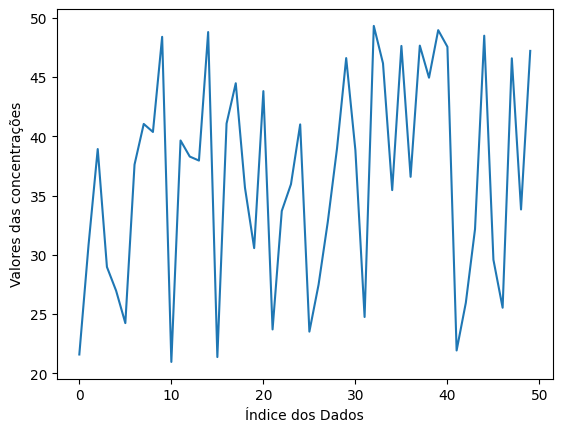

In [16]:
# Criando vetor de valores aleatórios com os valores de máxima e miníma das concentrações dos poluentes
import numpy as np
atvMax = 49.87 
atvMin = 20.89
n = 50
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin #valores que representam a concentração dos poluentes
print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)
ax.set_xlabel('Índice dos Dados')
ax.set_ylabel('Valores das concentrações')

In [8]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2024, 1, 1)
data_final = datetime(2024, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2024-01-01 00:00:00
2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00
2024-01-10 00:00:00
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00
2024-01-20 00:00:00
2024-01-21 00:00:00
2024-01-22 00:00:00
2024-01-23 00:00:00
2024-01-24 00:00:00
2024-01-25 00:00:00
2024-01-26 00:00:00
2024-01-27 00:00:00
2024-01-28 00:00:00
2024-01-29 00:00:00
2024-01-30 00:00:00
2024-01-31 00:00:00
2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00


In [9]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
print(df)


          Data  Mes
0   2024-01-01    1
1   2024-01-02    1
2   2024-01-03    1
3   2024-01-04    1
4   2024-01-05    1
..         ...  ...
361 2024-12-27   12
362 2024-12-28   12
363 2024-12-29   12
364 2024-12-30   12
365 2024-12-31   12

[366 rows x 2 columns]


In [10]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin 
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")


          Data  Mes  atividade
0   2024-01-01    1  22.752536
1   2024-01-02    1  31.719787
2   2024-01-03    1  42.763626
3   2024-01-04    1  43.978952
4   2024-01-05    1  34.865582
..         ...  ...        ...
361 2024-12-27   12  45.473413
362 2024-12-28   12  49.834956
363 2024-12-29   12  47.734690
364 2024-12-30   12  36.959809
365 2024-12-31   12  46.663991

[366 rows x 3 columns]


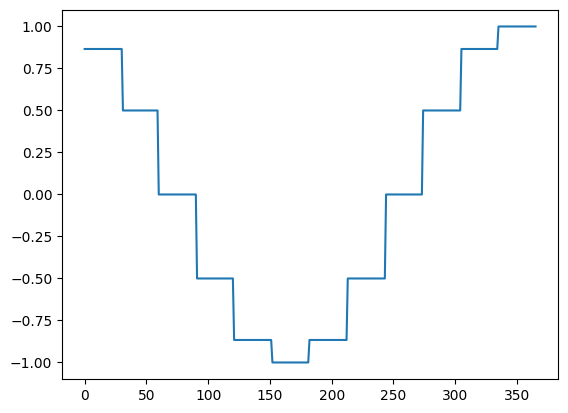

In [11]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Mes']/12) # convertendo mês para ângulo em radiano
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade + 1
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")

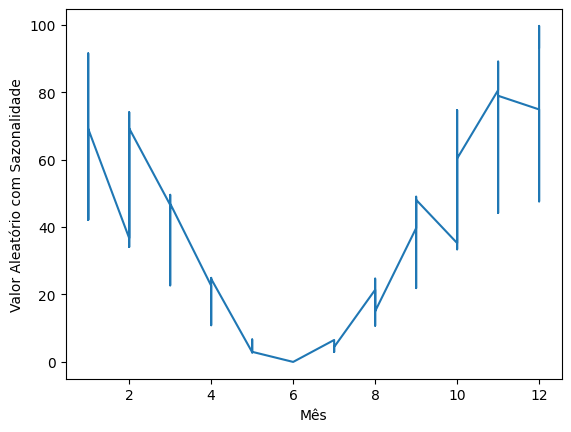

In [12]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] #Multiplicando a coluna 'atividade' (que representa os valores aleatórios) pela coluna 'sazonalidade'.

plt.plot(df['Mes'], df['aleatorioSazonal'])
plt.xlabel('Mês') 
plt.ylabel('Valor Aleatório com Sazonalidade')  
plt.show()

c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['sazonal_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Variabilidade da taxa de atividade: 2.098353626868695


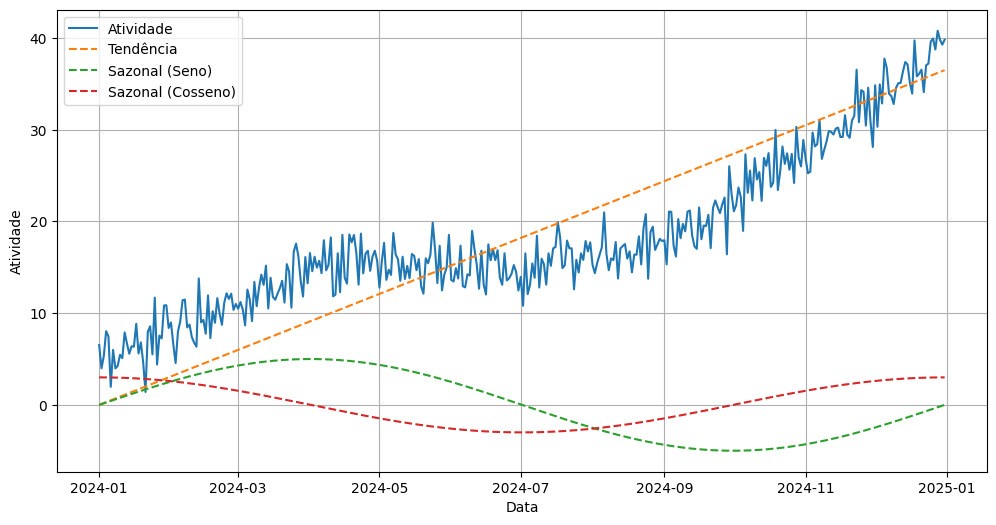

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D') #Gera um intervalo de datas de 1 de janeiro de 2024 a 31 de dezembro de 2024, com frequência diária.
n = len(dates) #comprimento do intervalo de datas.
trend = 0.1 * np.arange(n)  # tendência linear multiplicando uma sequência numérica pelo valor 0.1.
sazonal_sin = 5 * np.sin(2 * np.pi * np.arange(n) / 365)  # componente sazonal seno
sazonal_cos = 3 * np.cos(2 * np.pi * np.arange(n) / 365)  # componente sazonal cosseno
noise = np.random.normal(loc=0, scale=2, size=n)  # ruído aleatório usando uma distribuição normal com média 0 e desvio padrão 2.
taxa_atividade = trend + sazonal_sin + sazonal_cos + noise #Calcula a taxa de atividade como a soma da tendência, componente sazonal senoidal, componente sazonal cosenoidal e ruído.

# Criar DataFrame
data = pd.DataFrame({'Date': dates, 'Atividade': taxa_atividade}) #Cria um DataFrame com as datas e a taxa de atividade.
data.set_index('Date', inplace=True) 

# Ajustar o modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average)
model = sm.tsa.SARIMAX(data['Atividade'], order=(1, 1, 1), sazonal_order=(1, 1, 1, 12)) # Define um modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average) com uma ordem de diferenciação de 1, ordens ARMA de 1 e uma sazonalidade anual com ordens ARMA de 1
results = model.fit() # Ajusta o modelo aos dados.

# Calcular a variabilidade da taxa de atividade
variability = np.std(results.resid) #Calcula o desvio padrão dos resíduos do modelo ajustado.
print("Variabilidade da taxa de atividade:", variability) 

# Plotar os resultados de dados de taxa de atividade, tendência, componente sazonal senoidal e componente sazonal cosenoidal em um gráfico.
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Atividade'], label='Atividade')
plt.plot(data.index, trend, label='Tendência', linestyle='--')
plt.plot(data.index, sazonal_sin, label='Sazonal (Seno)', linestyle='--')
plt.plot(data.index, sazonal_cos, label='Sazonal (Cosseno)', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Atividade')
plt.legend()
plt.grid(True)
plt.show()